### Project: Regression - Week 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression

from statsmodels.api import OLS, add_constant
from sklearn.datasets import fetch_california_housing

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape, df.columns

((10886, 12),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'))

### Create time-related features

### Extract features like hour, month etc. from the datetime column.

In [4]:
def create_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['week'] = df['datetime'].dt.isocalendar().week
    df['day_of_week'] = df['datetime'].dt.weekday
create_datetime(df)

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,52,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,52,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,52,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,52,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,52,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,51,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,51,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,51,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,51,2


In [6]:
X = df.drop(['casual', 'registered', 'count', 'datetime'], axis=1)
y = df['count']

In [7]:
# The function train_test_split() randomly separate the data. If you want controll the randomness you set the random_state to a value
Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.20, random_state=60)

In [8]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((8708, 14), (2178, 14), (8708,), (2178,))

In [9]:
df_train = pd.concat([Xtrain, ytrain], axis=1)
df_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week,count
2308,2,0,0,1,22.14,25.760,56,12.9980,2011,6,4,2,22,5,59
3052,3,0,0,1,24.60,29.545,73,8.9981,2011,7,16,2,28,5,58
1984,2,0,1,1,25.42,31.060,41,15.0013,2011,5,9,14,19,0,162
7483,2,0,1,1,17.22,21.210,50,12.9980,2012,5,11,4,19,4,9
4047,3,0,1,2,24.60,30.305,60,11.0014,2011,9,19,16,38,0,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10339,4,0,1,2,12.30,15.910,65,6.0032,2012,11,16,5,46,4,36
6543,1,0,1,1,14.76,16.665,34,22.0028,2012,3,9,21,10,4,141
1418,2,0,1,2,26.24,31.060,47,15.0013,2011,4,4,23,14,0,48
3137,3,0,1,1,36.08,40.910,44,12.9980,2011,7,19,15,29,1,158


In [10]:
df_val = pd.concat([Xval, yval], axis=1)
df_val

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,week,day_of_week,count
218,1,0,1,2,5.74,6.060,50,16.9979,2011,1,10,9,2,0,94
6548,1,0,0,1,10.66,12.120,41,16.9979,2012,3,10,2,10,5,42
6597,1,0,1,1,13.94,16.665,61,12.9980,2012,3,12,4,11,0,3
8026,2,0,1,1,28.70,32.575,48,16.9979,2012,6,14,19,24,3,579
8937,3,0,1,1,31.16,35.605,62,19.0012,2012,8,14,18,33,1,854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,1,0,1,2,26.24,31.060,50,12.9980,2012,3,15,19,11,3,425
10437,4,0,0,2,9.84,12.120,87,8.9981,2012,12,1,7,48,5,63
8768,3,0,1,2,31.98,37.120,62,8.9981,2012,8,7,17,32,1,868
5827,1,0,1,2,18.86,22.725,77,22.0028,2012,1,18,0,3,2,17


In [11]:
# Create a list of features
forward_features = []

# Original features
feature_list = Xtrain.columns

In [12]:
Xtrain.week.astype(int)

2308     22
3052     28
1984     19
7483     19
4047     38
         ..
10339    46
6543     10
1418     14
3137     29
2253     22
Name: week, Length: 8708, dtype: int64

In [13]:
Xtrain.week = Xtrain.week.astype(int)
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 2308 to 2253
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       8708 non-null   int64  
 1   holiday      8708 non-null   int64  
 2   workingday   8708 non-null   int64  
 3   weather      8708 non-null   int64  
 4   temp         8708 non-null   float64
 5   atemp        8708 non-null   float64
 6   humidity     8708 non-null   int64  
 7   windspeed    8708 non-null   float64
 8   year         8708 non-null   int64  
 9   month        8708 non-null   int64  
 10  day          8708 non-null   int64  
 11  hour         8708 non-null   int64  
 12  week         8708 non-null   int64  
 13  day_of_week  8708 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 1020.5 KB


In [14]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])
# Run a linear regression separately on each of the features

while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(ytrain, Xtrain[forward_features + [feature]])
#         print(forward_features + [feature])
        result = m_feature.fit()
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

['season']
['season', 'temp']
['season', 'temp', 'hour']
['season', 'temp', 'hour', 'humidity']
['season', 'temp', 'hour', 'humidity', 'year']
['season', 'temp', 'hour', 'humidity', 'year', 'month']
['season', 'temp', 'hour', 'humidity', 'year', 'month', 'atemp']
['season', 'temp', 'hour', 'humidity', 'year', 'month', 'atemp', 'day']


In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.688
Model:                            OLS   Adj. R-squared (uncentered):              0.688
Method:                 Least Squares   F-statistic:                              2135.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):                        0.00
Time:                        14:04:08   Log-Likelihood:                         -55837.
No. Observations:                8708   AIC:                                  1.117e+05
Df Residuals:                    8699   BIC:                                  1.118e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
season        -12.8346      5.963     -2.152      0.031     -24.524      -1.146
temp            3.2361      1.154      2.805      0.005       0.975       5.497
hour            7.5234      0.240     31.380      0.000       7.053       7.993
humidity       -2.3746      0.088    -26.886      0.000      -2.548      -2.201
year            0.0244      0.005      5.224      0.000       0.015       0.034
month          11.6499      1.939      6.008      0.000       7.849      15.451
atemp           3.5958      1.059      3.395      0.001       1.519       5.672
day             0.6151      0.289      2.127      0.033       0.048       1.182
day_of_week     0.6584      0.791      0.832      0.405      -0.892       2.209
==============================================================================
Omnibus:                     2044.232   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4509.322
Skew:                           1.347   Prob(JB):                         0.00
Kurtosis:                       5.273   Cond. No.                     7.96e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
forward_features

['season', 'temp', 'hour', 'humidity', 'year', 'month', 'atemp', 'day']

In [17]:
possible_models[['features', 'r2']]

,features,r2
0,[season],0.504036
1,"[season, temp]",0.603815
2,"[season, temp, hour]",0.649612
3,"[season, temp, hour, humidity]",0.685215
4,"[season, temp, hour, humidity, year]",0.686458
5,"[season, temp, hour, humidity, year, month]",0.687788
6,"[season, temp, hour, humidity, year, month, at...",0.688187
7,"[season, temp, hour, humidity, year, month, at...",0.688348


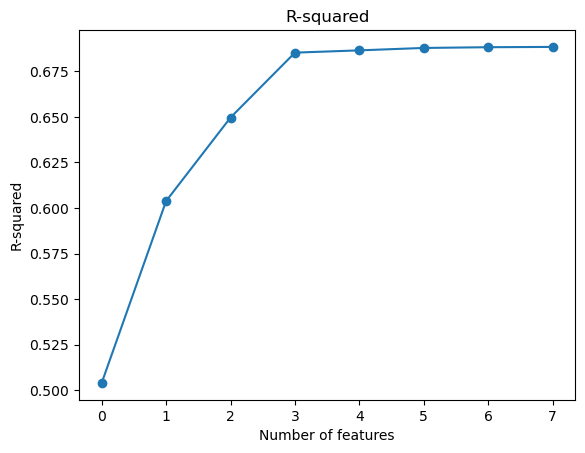

In [18]:
possible_models['r2'].plot(marker="o")
plt.title('R-squared')
plt.xlabel('Number of features')
plt.ylabel('R-squared')
plt.show()